# Short Skimage Tutorial

This is a very short introduction to the [Scikit-image library](https://scikit-image.org/docs/stable/user_guide.html), including the main operations for image manipulation.

What is an image? Images are n-dimensional arrays where each element corresponds to a pixel. 

Images manipulated by the Scikit-image library are stored as Numpy arrays.

 See [A crash course on NumPy for images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-indexing) for more information.
 
 The most common [image types](https://scikit-image.org/docs/stable/user_guide/data_types.html) are:

a) grey-level images containing 1 channel of X rows and Y columns.

b) RGB /color images containing 3 channels per color (RGB) where each channel/plane is formed by X rows and Y columns.

## Spatial and photometric resolution: 
### Function `rescale` 

Sometimes we need to change the spatial and photometric resolution of an image. For this, we will use functions like rescale and resize. Consider the following example:

In [1]:
from skimage import data
from skimage.transform import rescale
import numpy as np
import matplotlib.pyplot as plt

image = data.coins()
print(image.dtype, image.min(), image.max(), image.shape)

uint8 1 252 (303, 384)


float64 0.0157 0.9114 (152, 192)


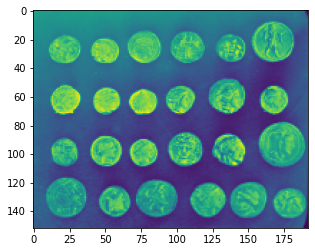

In [2]:
rescaled = rescale(image, 0.5)
print(rescaled.dtype, np.round(rescaled.min(),4), np.round(rescaled.max(),4), rescaled.shape)
plt.imshow(rescaled)
plt.show()

What does the function rescale do? Check skimage documentation. What is the difference with the resize command?

float64 4.0 232.4046 (152, 192)


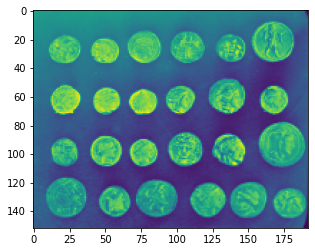

In [3]:
rescaled2 = rescale(image, 0.5, preserve_range=True) # sigue 0-255
print(rescaled2.dtype, np.round(rescaled2.min(),4), np.round(rescaled2.max(),4), rescaled2.shape)
plt.imshow(rescaled2)
plt.show()

**R:** El valor ha cambiado porque al reducir la imagen se hace la media de los vecinos.

How to rescale intensity values?

uint8 255 0 (512, 512)


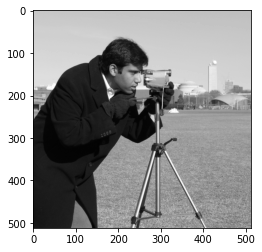

In [4]:
camera = data.camera()
print(camera.dtype, camera.max(), camera.min(), camera.shape)
plt.imshow(camera, cmap='gray')
plt.show()

float64 127.5 0.0 (512, 512)


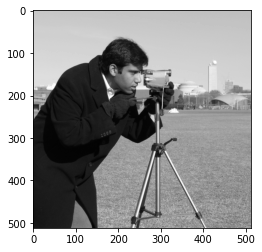

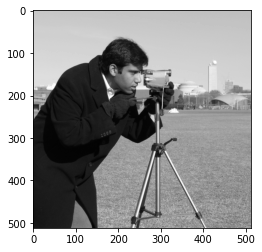

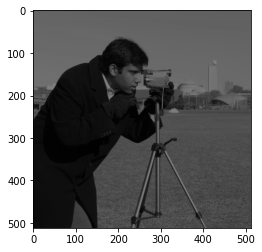

In [5]:
camera2 = camera/2
print(camera2.dtype, camera2.max(), camera2.min(), camera2.shape)
plt.imshow(camera2, cmap='gray')
plt.show()
plt.imshow(camera2, cmap='gray', vmin=camera2.min(), vmax=camera2.max())
plt.show()
plt.imshow(camera2, cmap='gray', vmin=0, vmax=255)
plt.show()

float64 227.5 100.0 (512, 512)


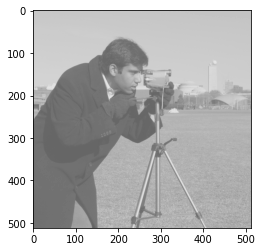

In [6]:
camera3 = camera2+100
print(camera3.dtype, camera3.max(), camera3.min(), camera3.shape)
plt.imshow(camera3, cmap='gray', vmin=0, vmax=255)
plt.show()

What is the difference between rescale and resize?

uint8 233 3 (64, 64)


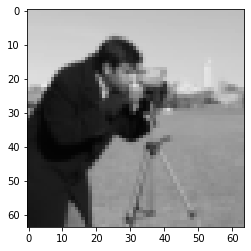

In [7]:
from skimage.transform import resize
from skimage import img_as_ubyte # img_as_ubyte Convert an image to 8-bit unsigned integer format

camera4 = img_as_ubyte(resize(camera,(64,64))) 
print(camera4.dtype, camera4.max(), camera4.min(), camera4.shape)
plt.imshow(camera4, cmap='gray', vmin=0, vmax=255)
plt.show()

**R:** Rescale operation resizes an image by a given scaling factor and also preserve the scale of intensity values.<br>
Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor (width and height).

More examples can be seen in the [Matplotlib Image tutorial](https://matplotlib.org/users/image_tutorial.html).

### Conversion from RGBA to RGB - Removing alpha channel through alpha blending

Often you can find color images in format [RGBA](https://en.wikipedia.org/wiki/Alpha_compositing#Alpha_blending). The forth component shows the coefficient of blending of each channel. Converting an RGBA image to an RGB image by alpha blending it with a background is performend by the command `rgba2rgb()`.

dtype:  uint8
shape:  (500, 500, 4)


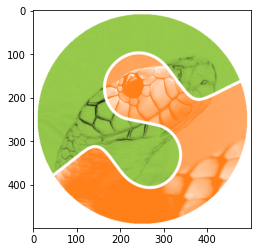

In [8]:
from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
print("dtype: ", img_rgba.dtype)
print('shape: ', img_rgba.shape)
plt.imshow(img_rgba)
plt.show()

dtype:  float64
shape:  (500, 500, 3)


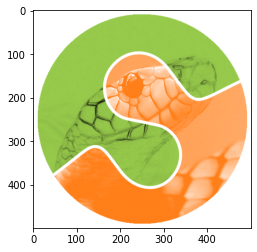

In [9]:
img_rgb = rgba2rgb(img_rgba)
print("dtype: ", img_rgb.dtype)
print('shape: ', img_rgb.shape)
plt.imshow(img_rgb)
plt.show()


### Conversion between color and gray values

Often we will need rto convert color images to gray level images. Converting an RGB image to a grayscale image is per with `rgb2gray()`

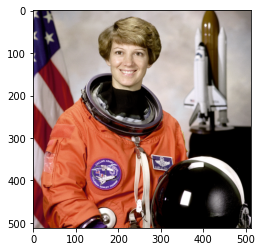

Note that dtype:  uint8 gray.max:  255


In [10]:
from skimage.color import rgb2gray

img = data.astronaut()
plt.imshow(img)
plt.show()
print ("Note that dtype: ", img.dtype, "gray.max: ", img.max()) 

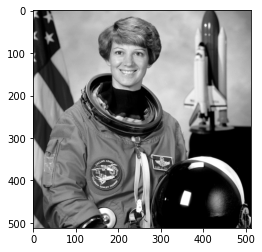

dtype:  float64 gray.max:  1.0


In [11]:
img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.show()
print ("dtype: ", img_gray.dtype, "gray.max: ", img_gray.max())

In [12]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
print("Red to gray: ", rgb2gray(red_pixel))

green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
print ("Green to gray: ", rgb2gray(green_pixel))


Red to gray:  [[0.2125]]
Green to gray:  [[0.7154]]


Given a gray image, how would it be looking if it is converted to RGB values? 

## Displaying  images and graphics

[Matplotlib](https://matplotlib.org/index.html) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

In [13]:
"""
Simple demo of the imshow function.
"""
import matplotlib.pyplot as plt #the basic module for plotting/displaying figures
from skimage import io

image = io.imread('images/ada.jpg')

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes
plt.show()

FileNotFoundError: No such file: '/home/arthurfont/Desktop/VA/Laboratory/Lab1/images/ada.jpg'

In [ ]:
"""
Demo of image that's been clipped by a circular patch.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook

image = io.imread('images/grace_hopper.jpg')

# Demo image
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes


# Adding the circular path
fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((100, 100), radius=90, transform=ax.transData)
im.set_clip_path(patch)
ax.axis('off')

plt.show()



See how to visualize multiple images:

The simples way is as follows:

In [ ]:
from skimage import img_as_uint

cat = data.chelsea()
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2, 2, 1)
plt.imshow(cat)
fig.add_subplot(2, 2, 2)
plt.imshow(rgb2gray(cat), cmap='gray')
fig.add_subplot(2, 2, 3)
plt.imshow(cat*2, vmin=0, vmax=255)
fig.add_subplot(2, 2, 4)
cat4=cat/2
print(cat4.dtype, cat4.min(), cat4.max())
plt.imshow(cat4.astype(int), vmin=0, vmax=255)

plt.show()

Explain the effect of the image processing above

Some other examples of multiple plots of figures:

In [ ]:
'''
Demo of the streamplot function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
'''

import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j] #returns a dense multi-dimensional “meshgrid”.
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn) #used to display 2D vector fields
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()

Another [example](https://matplotlib.org/examples/pylab_examples/image_nonuniform.html) of how to display multiple images:

In [ ]:
'''
This illustrates the NonUniformImage class.  It is not
available via an Axes method but it is easily added to an
Axes instance as shown here.
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
from matplotlib import cm

interp = 'nearest'

# Linear x array for cell centers:
x = np.linspace(-4, 4, 9)

# Highly nonlinear x array:
x2 = x**3

y = np.linspace(-4, 4, 9)

z = np.sqrt(x[np.newaxis, :]**2 + y[:, np.newaxis]**2)

fig, axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(bottom=0.07, hspace=0.3)
fig.suptitle('NonUniformImage class', fontsize='large')

# Image a)
ax = axs[0, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title('a) ' + interp + ' 1')

# Image b)
ax = axs[0, 1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title('b) ' + interp + ' 2')

interp = 'bilinear'

# Image c)
ax = axs[1, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title('c) ' + interp + ' 1')

# Image d)
ax = axs[1, 1]
im = NonUniformImage(ax,  interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title('d) ' + interp + ' 2')

plt.show()

Visualize in a figure four images, in 2 rows and 2 columns: a) the astronaut image, b) the astronaut with a black mask, c) the astronaut converted into gray levels and d) the astronaut with double reduced size. Add titles to explain what each image represents to. 

In [ ]:
"""Solution"""